In [245]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns

dataset1 = r"./dataset1.csv"
data=pd.read_csv(dataset1)

data.columns


Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'weathersit', 'temp'],
      dtype='object')

In [246]:
data = data.rename(columns={
       'hr' : 'hour',
       'weathersit' : 'weather',
       'temp' : 'temperature',
        'dteday' : 'date',
       'yr' : 'year',
       'mnth' : 'month',})
      
data.columns

Index(['instant', 'date', 'season', 'year', 'month', 'hour', 'holiday',
       'weekday', 'weather', 'temperature'],
      dtype='object')

In [247]:
data['year']

0      0
1      0
2      0
3      0
4      0
      ..
605    0
606    0
607    0
608    0
609    0
Name: year, Length: 610, dtype: int64

In [248]:
data = data.drop(columns=['year'])

In [249]:
data.columns

Index(['instant', 'date', 'season', 'month', 'hour', 'holiday', 'weekday',
       'weather', 'temperature'],
      dtype='object')

In [250]:
data['date'].value_counts()

date
01-01-2011    24
10-01-2011    24
09-01-2011    24
08-01-2011    24
17-01-2011    24
16-01-2011    24
21-01-2011    24
20-01-2011    24
15-01-2011    24
13-01-2011    24
07-01-2011    23
04-01-2011    23
25-01-2011    23
22-01-2011    23
23-01-2011    23
06-01-2011    23
05-01-2011    23
02-01-2011    23
19-01-2011    23
14-01-2011    23
24-01-2011    23
12-01-2011    22
03-01-2011    22
11-01-2011    22
26-01-2011    16
28-01-2011    15
18-01-2011    12
27-01-2011     8
Name: count, dtype: int64

In [251]:
data['temperature'].max()

np.float64(0.46)

In [252]:
data.isnull().sum()

instant        0
date           0
season         0
month          0
hour           0
holiday        0
weekday        0
weather        0
temperature    0
dtype: int64

In [253]:
data_date_and_temp_relation = data.groupby(['date']).agg({'temperature' : 'mean'},2)
data_date_and_temp_relation

,temperature
date,
01-01-2011,0.344167
02-01-2011,0.363478
03-01-2011,0.196364
04-01-2011,0.200000
05-01-2011,0.226957
06-01-2011,0.204348
07-01-2011,0.196522
08-01-2011,0.165000
09-01-2011,0.138333


In [254]:
ref_filtered_data = pd.DataFrame()
ref_filtered_data = data_date_and_temp_relation.reset_index()

<Axes: >

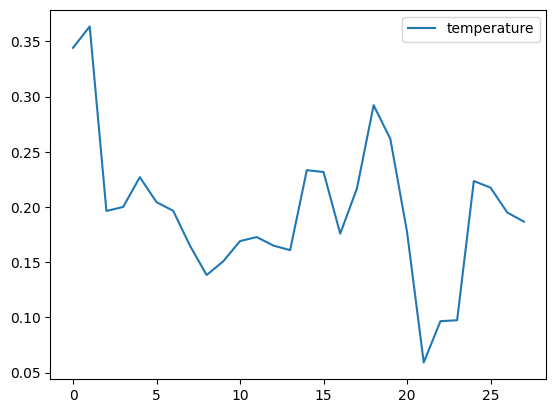

In [255]:
ref_filtered_data.plot()

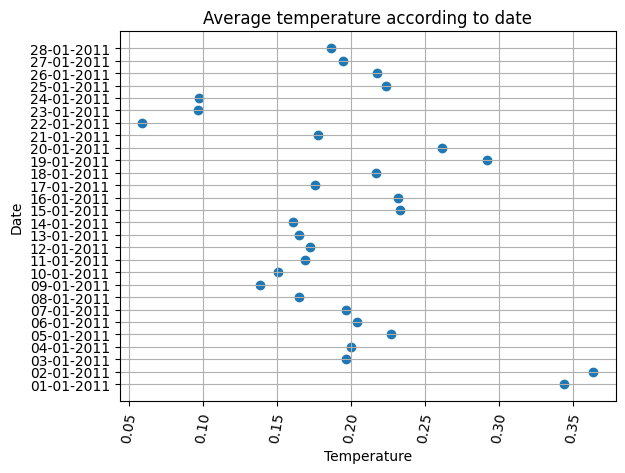

In [256]:
plt.scatter(ref_filtered_data['temperature'],ref_filtered_data['date'])
plt.title('Average temperature according to date')
plt.xlabel('Temperature')
plt.ylabel('Date')
plt.xticks(rotation = 80)
plt.grid()
plt.show()

In [257]:
data

,instant,date,season,month,hour,holiday,weekday,weather,temperature
0,1,01-01-2011,1,1,0,False,6,1,0.24
1,2,01-01-2011,1,1,1,False,6,1,0.22
2,3,01-01-2011,1,1,2,False,6,1,0.22
3,4,01-01-2011,1,1,3,False,6,1,0.24
4,5,01-01-2011,1,1,4,False,6,1,0.24
...,...,...,...,...,...,...,...,...,...
605,606,28-01-2011,1,1,11,False,5,3,0.18
606,607,28-01-2011,1,1,12,False,5,3,0.18
607,608,28-01-2011,1,1,13,False,5,3,0.18
608,609,28-01-2011,1,1,14,False,5,3,0.22


In [258]:
contious_data_list = []
categorical_data_list = []
     

In [259]:
categorical_data_list

[]

In [260]:
contious_data_list

[]

In [261]:
def get_continious_categorical_data_columns(data):
    continious_data_list = []
    categorical_data_list=[]
    for col in data.columns:
        print(f'col : {col} | Datatype : {data[col].dtypes}')
        if data[col].dtypes =="object":
          categorical_data_list.append(col)
        else:
          continious_data_list.append(col)
    return categorical_data_list, continious_data_list

categorical_data_list,continious_data_list = get_continious_categorical_data_columns(data)           

col : instant | Datatype : int64
col : date | Datatype : object
col : season | Datatype : int64
col : month | Datatype : int64
col : hour | Datatype : int64
col : holiday | Datatype : bool
col : weekday | Datatype : int64
col : weather | Datatype : int64
col : temperature | Datatype : float64


In [262]:
continious_data_list

['instant',
 'season',
 'month',
 'hour',
 'holiday',
 'weekday',
 'weather',
 'temperature']

In [263]:
categorical_data_list

['date']

In [264]:
data[continious_data_list].skew()

instant        0.000000
season         0.000000
month          0.000000
hour          -0.072059
holiday        4.750637
weekday        0.026403
weather        1.050244
temperature    0.665087
dtype: float64

In [265]:
data[continious_data_list].skew().index

Index(['instant', 'season', 'month', 'hour', 'holiday', 'weekday', 'weather',
       'temperature'],
      dtype='object')

In [266]:
data[continious_data_list].skew().values

array([ 0.        ,  0.        ,  0.        , -0.07205892,  4.75063727,
        0.02640311,  1.05024419,  0.66508679])

In [267]:
data[continious_data_list]

,instant,season,month,hour,holiday,weekday,weather,temperature
0,1,1,1,0,False,6,1,0.24
1,2,1,1,1,False,6,1,0.22
2,3,1,1,2,False,6,1,0.22
3,4,1,1,3,False,6,1,0.24
4,5,1,1,4,False,6,1,0.24
...,...,...,...,...,...,...,...,...
605,606,1,1,11,False,5,3,0.18
606,607,1,1,12,False,5,3,0.18
607,608,1,1,13,False,5,3,0.18
608,609,1,1,14,False,5,3,0.22


In [268]:
data['holiday']=data['holiday'].astype(int)

instant


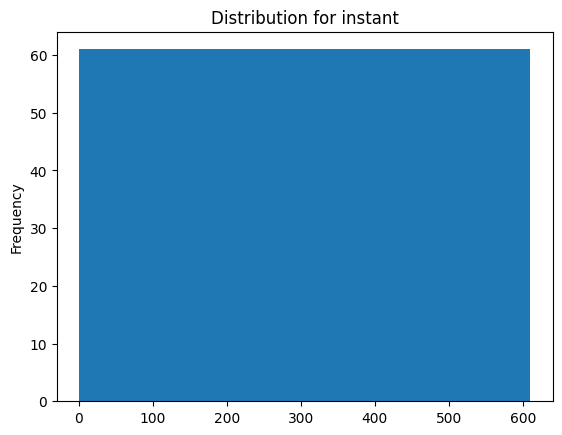

season


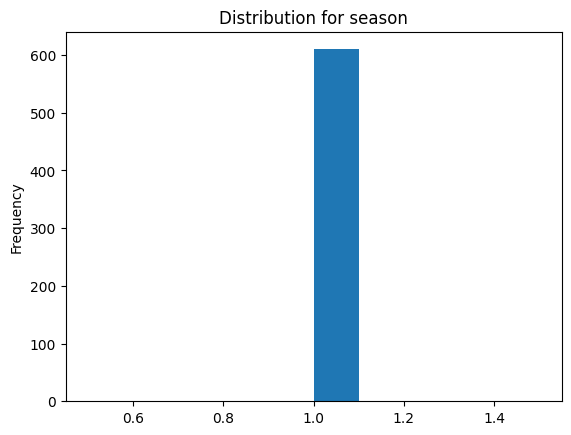

month


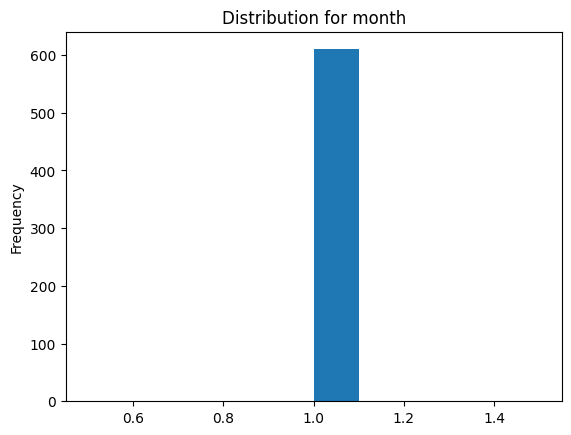

hour


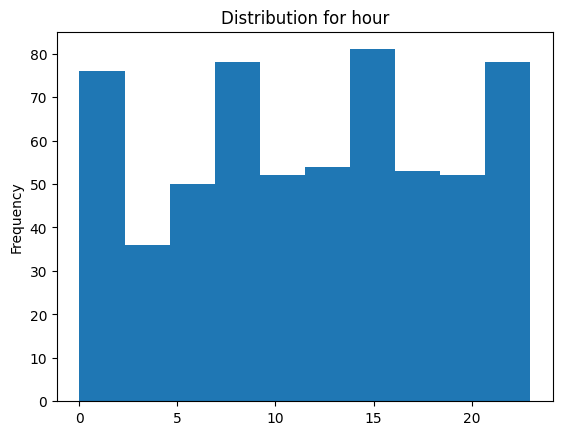

holiday


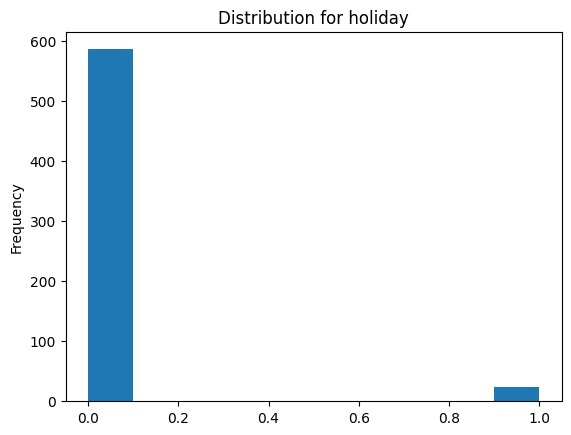

weekday


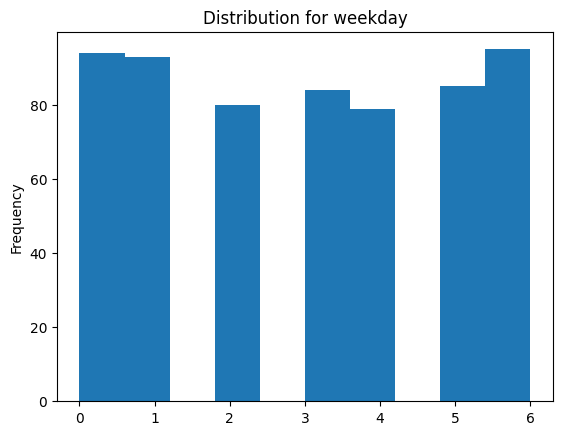

weather


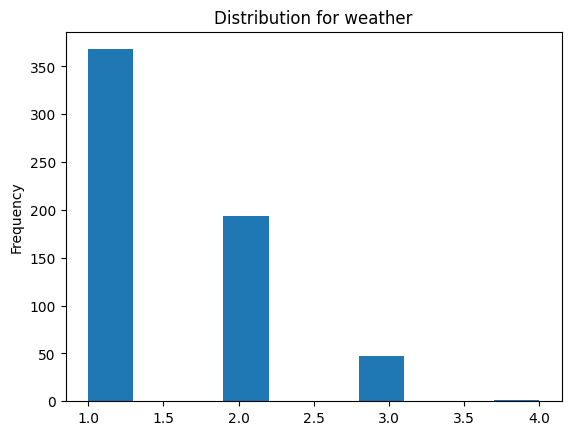

temperature


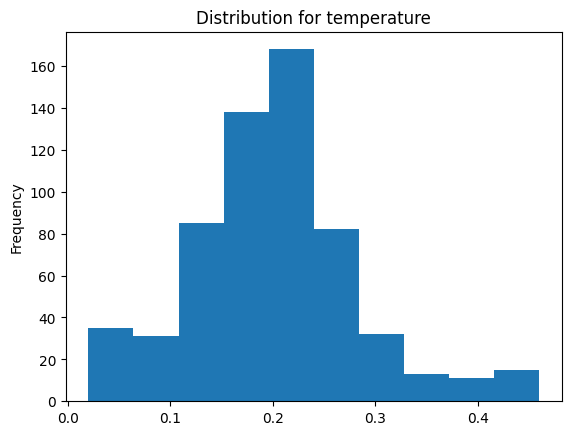

In [269]:
for col in data[continious_data_list].skew().index.tolist():
    print(col)
    data[col].plot(kind='hist')
    plt.title(f"Distribution for {col}")
    plt.show()

In [270]:
correlation = data[continious_data_list].corr()

In [271]:
# Correlation of the data
data[continious_data_list].corr(method = "pearson")


,instant,season,month,hour,holiday,weekday,weather,temperature
instant,1.000000,NaN,NaN,0.025355,0.090792,0.015448,0.162506,-0.314224
season,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hour,0.025355,NaN,NaN,1.000000,-0.008722,-0.021792,-0.056370,0.165148
holiday,0.090792,NaN,NaN,-0.008722,1.000000,-0.194864,0.217058,-0.052444
weekday,0.015448,NaN,NaN,-0.021792,-0.194864,1.000000,0.065414,0.040457
weather,0.162506,NaN,NaN,-0.056370,0.217058,0.065414,1.000000,0.224919
temperature,-0.314224,NaN,NaN,0.165148,-0.052444,0.040457,0.224919,1.000000


In [272]:
data[continious_data_list].corr(method = 'spearman')

,instant,season,month,hour,holiday,weekday,weather,temperature
instant,1.000000,NaN,NaN,0.025310,0.090792,0.015026,0.151411,-0.221096
season,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hour,0.025310,NaN,NaN,1.000000,-0.008627,-0.020881,-0.073212,0.160030
holiday,0.090792,NaN,NaN,-0.008627,1.000000,-0.191043,0.230441,-0.065718
weekday,0.015026,NaN,NaN,-0.020881,-0.191043,1.000000,0.075054,0.051056
weather,0.151411,NaN,NaN,-0.073212,0.230441,0.075054,1.000000,0.219001
temperature,-0.221096,NaN,NaN,0.160030,-0.065718,0.051056,0.219001,1.000000


<Axes: >

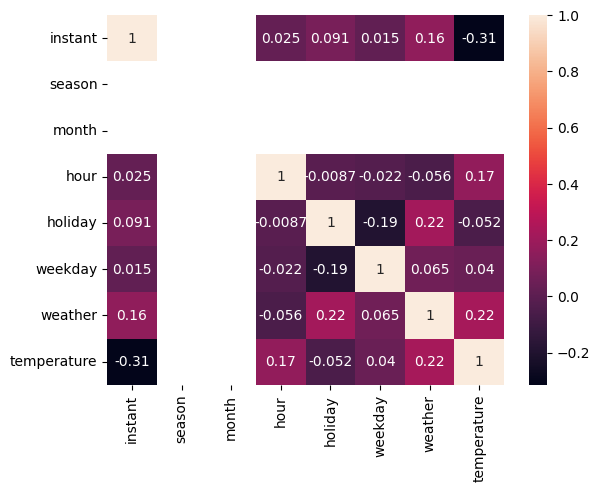

In [273]:
import seaborn as sns
sns.heatmap(data[continious_data_list].corr(method = 'pearson'), annot = True)

In [274]:
# DATASET 2

In [275]:
dataset2 = r"./dataset2.csv"
data2=pd.read_csv(dataset2)
data2.columns

Index(['Unnamed: 0', 'instant', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

In [276]:
data.columns

Index(['instant', 'date', 'season', 'month', 'hour', 'holiday', 'weekday',
       'weather', 'temperature'],
      dtype='object')

In [277]:
data2=data2.drop(columns=['Unnamed: 0'])

In [278]:
data2=data2.rename(columns={
    'hum':'humidity',
    'cnt':'count'
})

In [279]:
data2.columns

Index(['instant', 'atemp', 'humidity', 'windspeed', 'casual', 'registered',
       'count'],
      dtype='object')

In [280]:
data2['instant'].value_counts()

instant
610    1
1      1
594    1
593    1
592    1
      ..
7      1
6      1
5      1
4      1
3      1
Name: count, Length: 610, dtype: int64

In [281]:
data2.isnull().sum()

instant        0
atemp         11
humidity       0
windspeed      0
casual         0
registered     0
count          0
dtype: int64

In [282]:
null_columns = data2[data2.isnull().any(axis=1)]
null_columns


,instant,atemp,humidity,windspeed,casual,registered,count
8,9,NaN,0.75,0.0000,1,7,8
17,18,NaN,0.82,0.2836,15,52,67
23,24,NaN,0.88,0.2985,15,24,39
28,29,NaN,0.94,0.1940,2,1,3
32,33,NaN,0.76,0.2239,1,19,20
37,38,NaN,0.76,0.1940,4,55,59
43,44,NaN,0.39,0.3582,5,17,22
48,49,NaN,0.44,0.4179,0,2,2
58,59,NaN,0.35,0.2836,8,53,61
65,66,NaN,0.47,0.1045,3,49,52


In [283]:
data2 = data2.dropna(subset=['atemp'])
data2

,instant,atemp,humidity,windspeed,casual,registered,count
0,1,0.2879,0.81,0.0000,3,13,16
1,2,0.2727,0.80,0.0000,8,32,40
2,3,0.2727,0.80,0.0000,5,27,32
3,4,0.2879,0.75,0.0000,3,10,13
4,5,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...
605,606,0.2121,0.93,0.1045,0,30,30
606,607,0.2121,0.93,0.1045,1,28,29
607,608,0.2121,0.93,0.1045,0,31,31
608,609,0.2727,0.80,0.0000,2,36,38


In [284]:
data2.isnull().sum()

instant       0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [285]:
merged_data=pd.merge(data,data2,on='instant',how='inner')
merged_data

,instant,date,season,month,hour,holiday,weekday,weather,temperature,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2011,1,1,0,0,6,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,01-01-2011,1,1,1,0,6,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,01-01-2011,1,1,2,0,6,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,01-01-2011,1,1,3,0,6,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,01-01-2011,1,1,4,0,6,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594,606,28-01-2011,1,1,11,0,5,3,0.18,0.2121,0.93,0.1045,0,30,30
595,607,28-01-2011,1,1,12,0,5,3,0.18,0.2121,0.93,0.1045,1,28,29
596,608,28-01-2011,1,1,13,0,5,3,0.18,0.2121,0.93,0.1045,0,31,31
597,609,28-01-2011,1,1,14,0,5,3,0.22,0.2727,0.80,0.0000,2,36,38


In [286]:
merged_data.isnull().sum()

instant        0
date           0
season         0
month          0
hour           0
holiday        0
weekday        0
weather        0
temperature    0
atemp          0
humidity       0
windspeed      0
casual         0
registered     0
count          0
dtype: int64

In [301]:
dataset3 = r"./dataset3.csv"
data3=pd.read_csv(dataset3)
data3=data3.drop(columns='yr')

In [302]:
data3=data3.rename(columns={
    'dteday':'date',
    'mnth':'month',
    'weathersit':'weather',
    'hum':'humidity',
    'cnt':'count',
    'hr':'hour',
    'temp':'temperature'
}) 
data3

,instant,date,season,month,hour,holiday,weekday,weather,temperature,atemp,humidity,windspeed,casual,registered,count
0,620,29-01-2011,1,1,1,False,6,1,0.22,0.2273,0.64,0.1940,0,20,20
1,621,29-01-2011,1,1,2,False,6,1,0.22,0.2273,0.64,0.1642,0,15,15
2,622,29-01-2011,1,1,3,False,6,1,0.20,0.2121,0.64,0.1343,3,5,8
3,623,29-01-2011,1,1,4,False,6,1,0.16,0.1818,0.69,0.1045,1,2,3
4,624,29-01-2011,1,1,6,False,6,1,0.16,0.1818,0.64,0.1343,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,615,28-01-2011,1,1,20,False,5,2,0.24,0.2273,0.70,0.1940,1,61,62
386,616,28-01-2011,1,1,21,False,5,2,0.22,0.2273,0.75,0.1343,1,57,58
387,617,28-01-2011,1,1,22,False,5,1,0.24,0.2121,0.65,0.3582,0,26,26
388,618,28-01-2011,1,1,23,False,5,1,0.24,0.2273,0.60,0.2239,1,22,23


In [303]:
data3.isnull().sum()

instant        0
date           0
season         0
month          0
hour           0
holiday        0
weekday        0
weather        0
temperature    0
atemp          0
humidity       0
windspeed      0
casual         0
registered     0
count          0
dtype: int64

In [304]:
data3['holiday']=data3['holiday'].astype(int)
data3

,instant,date,season,month,hour,holiday,weekday,weather,temperature,atemp,humidity,windspeed,casual,registered,count
0,620,29-01-2011,1,1,1,0,6,1,0.22,0.2273,0.64,0.1940,0,20,20
1,621,29-01-2011,1,1,2,0,6,1,0.22,0.2273,0.64,0.1642,0,15,15
2,622,29-01-2011,1,1,3,0,6,1,0.20,0.2121,0.64,0.1343,3,5,8
3,623,29-01-2011,1,1,4,0,6,1,0.16,0.1818,0.69,0.1045,1,2,3
4,624,29-01-2011,1,1,6,0,6,1,0.16,0.1818,0.64,0.1343,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,615,28-01-2011,1,1,20,0,5,2,0.24,0.2273,0.70,0.1940,1,61,62
386,616,28-01-2011,1,1,21,0,5,2,0.22,0.2273,0.75,0.1343,1,57,58
387,617,28-01-2011,1,1,22,0,5,1,0.24,0.2121,0.65,0.3582,0,26,26
388,618,28-01-2011,1,1,23,0,5,1,0.24,0.2273,0.60,0.2239,1,22,23


In [305]:
final_data=pd.concat([merged_data,data3],ignore_index=True)
final_data

,instant,date,season,month,hour,holiday,weekday,weather,temperature,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2011,1,1,0,0,6,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,01-01-2011,1,1,1,0,6,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,01-01-2011,1,1,2,0,6,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,01-01-2011,1,1,3,0,6,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,01-01-2011,1,1,4,0,6,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
984,615,28-01-2011,1,1,20,0,5,2,0.24,0.2273,0.70,0.1940,1,61,62
985,616,28-01-2011,1,1,21,0,5,2,0.22,0.2273,0.75,0.1343,1,57,58
986,617,28-01-2011,1,1,22,0,5,1,0.24,0.2121,0.65,0.3582,0,26,26
987,618,28-01-2011,1,1,23,0,5,1,0.24,0.2273,0.60,0.2239,1,22,23


In [306]:
final_data.isnull().sum()

instant        0
date           0
season         0
month          0
hour           0
holiday        0
weekday        0
weather        0
temperature    0
atemp          0
humidity       0
windspeed      0
casual         0
registered     0
count          0
dtype: int64

In [308]:
final_data=final_data.rename(columns={
    'atemp':'average_temperature'
}) 

final_data

,instant,date,season,month,hour,holiday,weekday,weather,temperature,average_temperature,humidity,windspeed,casual,registered,count
0,1,01-01-2011,1,1,0,0,6,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,01-01-2011,1,1,1,0,6,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,01-01-2011,1,1,2,0,6,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,01-01-2011,1,1,3,0,6,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,01-01-2011,1,1,4,0,6,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
984,615,28-01-2011,1,1,20,0,5,2,0.24,0.2273,0.70,0.1940,1,61,62
985,616,28-01-2011,1,1,21,0,5,2,0.22,0.2273,0.75,0.1343,1,57,58
986,617,28-01-2011,1,1,22,0,5,1,0.24,0.2121,0.65,0.3582,0,26,26
987,618,28-01-2011,1,1,23,0,5,1,0.24,0.2273,0.60,0.2239,1,22,23


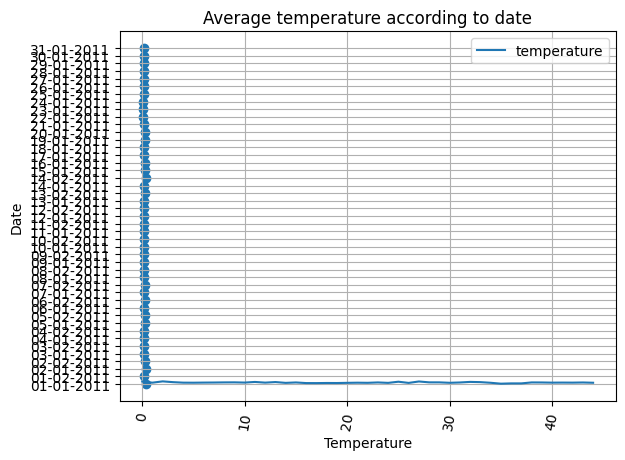

col : instant | Datatype : int64
col : date | Datatype : object
col : season | Datatype : int64
col : month | Datatype : int64
col : hour | Datatype : int64
col : holiday | Datatype : int64
col : weekday | Datatype : int64
col : weather | Datatype : int64
col : temperature | Datatype : float64
col : average_temperature | Datatype : float64
col : humidity | Datatype : float64
col : windspeed | Datatype : float64
col : casual | Datatype : int64
col : registered | Datatype : int64
col : count | Datatype : int64
instant


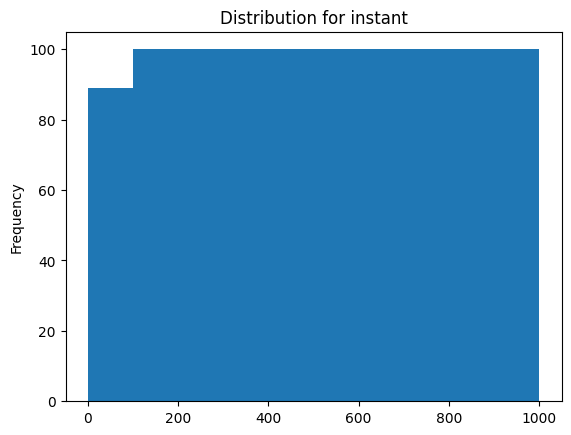

season


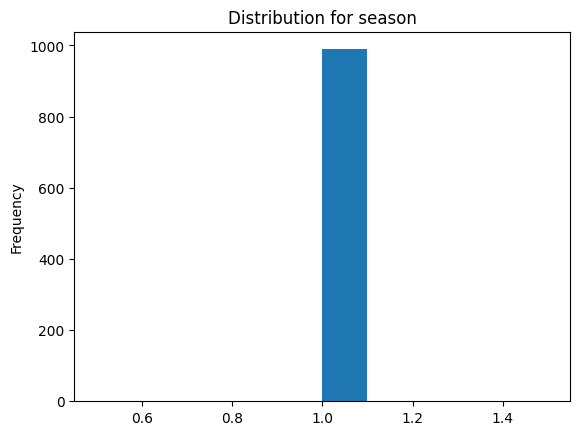

month


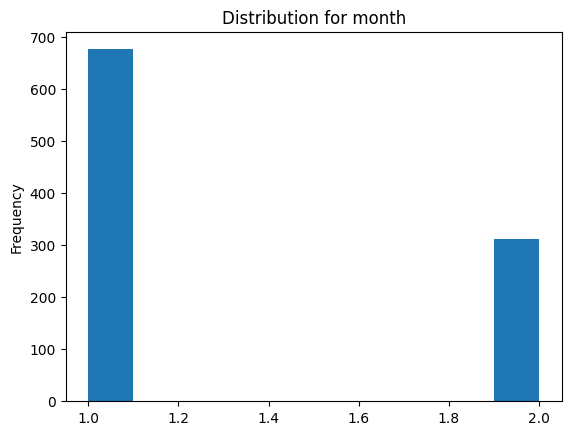

hour


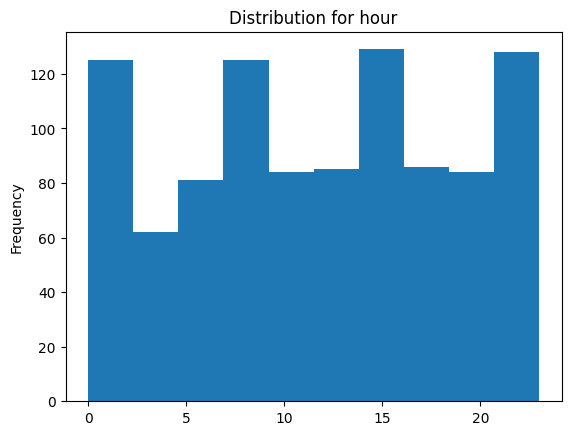

holiday


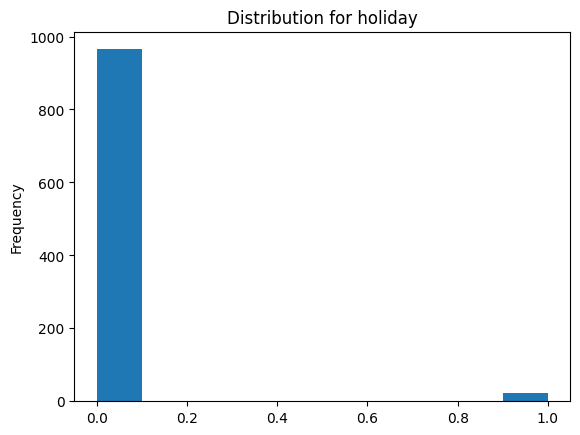

weekday


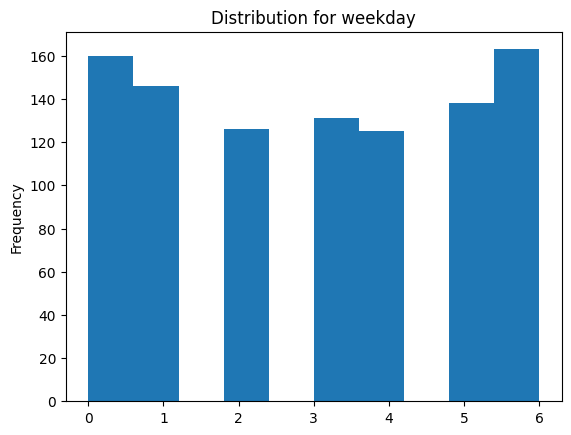

weather


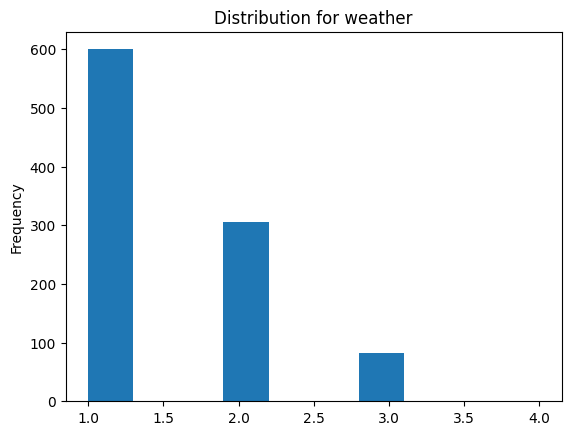

temperature


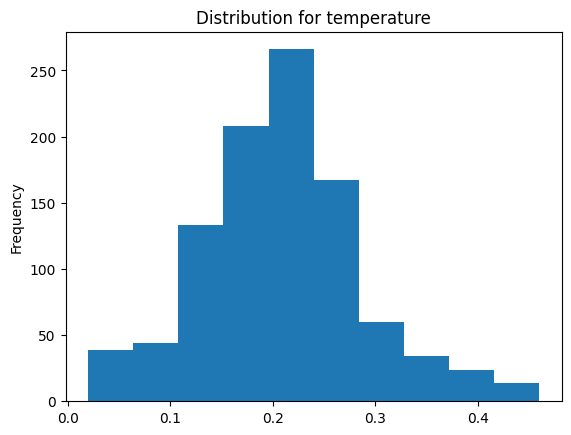

average_temperature


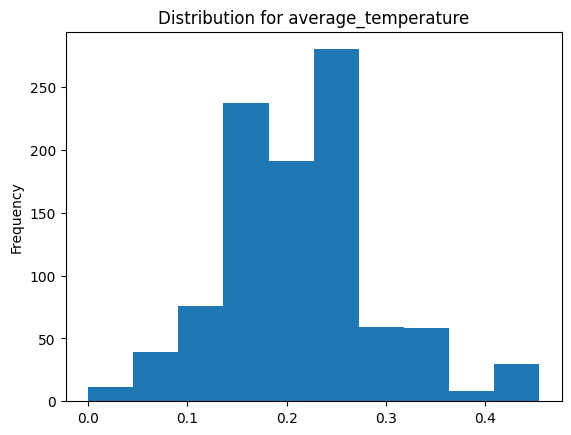

humidity


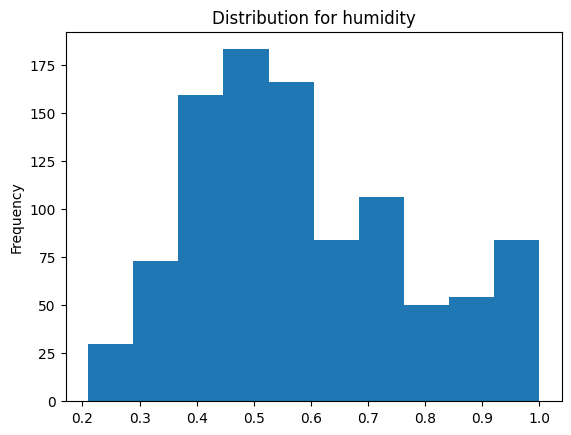

windspeed


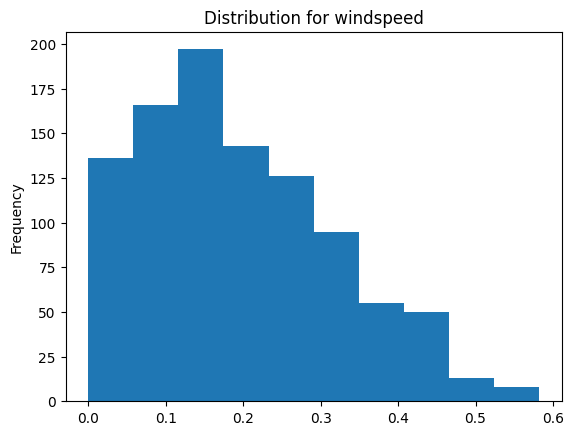

casual


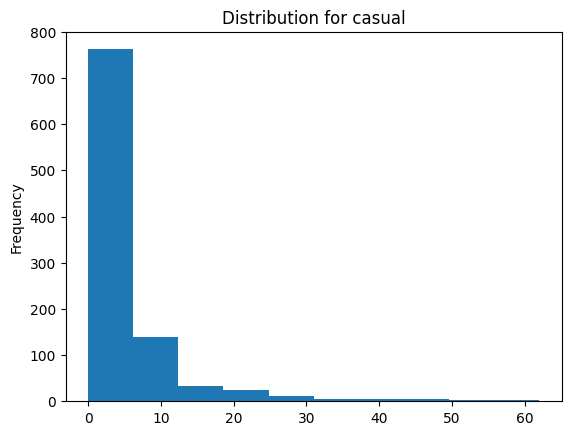

registered


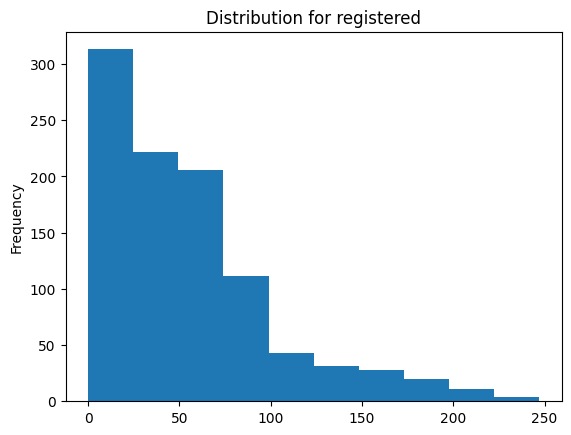

count


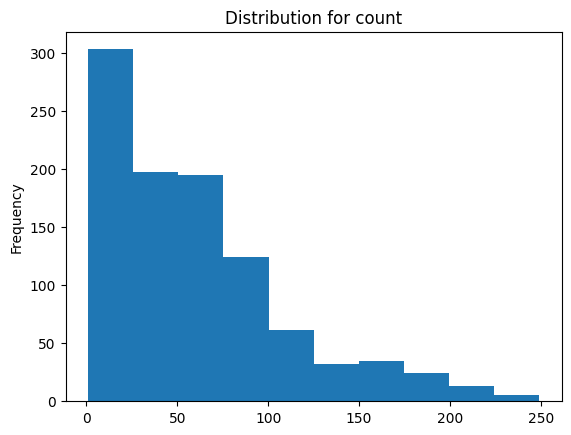

<Axes: >

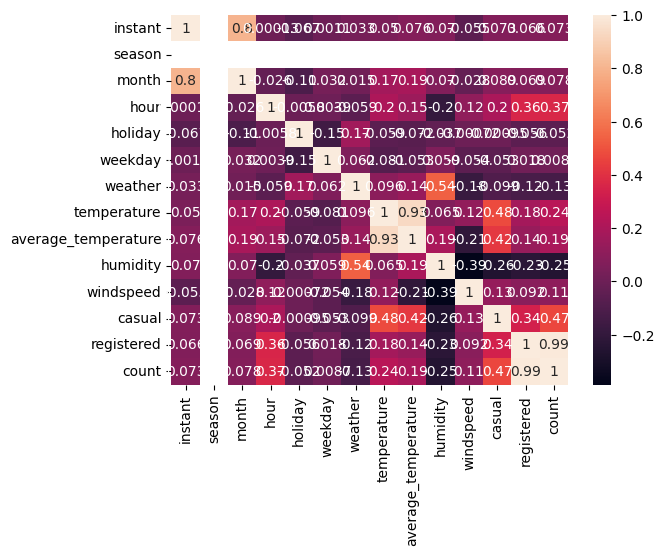

In [309]:
data_date_and_temp_relation = final_data.groupby(['date']).agg({'temperature' : 'mean'},2)
ref_filtered_data = pd.DataFrame()
ref_filtered_data = data_date_and_temp_relation.reset_index()
ref_filtered_data.plot()
plt.scatter(ref_filtered_data['temperature'],ref_filtered_data['date'])
plt.title('Average temperature according to date')
plt.xlabel('Temperature')
plt.ylabel('Date')
plt.xticks(rotation = 80)
plt.grid()
plt.show()

def get_continious_categorical_data_columns(final_data):
    continious_data_list = []
    categorical_data_list=[]
    for col in final_data.columns:
        print(f'col : {col} | Datatype : {final_data[col].dtypes}')
        if final_data[col].dtypes =="object":
          categorical_data_list.append(col)
        else:
          continious_data_list.append(col)
    return categorical_data_list, continious_data_list

categorical_data_list,continious_data_list = get_continious_categorical_data_columns(final_data)           

final_data[continious_data_list].skew()
final_data[continious_data_list].skew().index
final_data[continious_data_list].skew().values


def plotData():
  for col in final_data[continious_data_list].skew().index.tolist():
    final_data[col].plot(kind='hist')
    plt.title(f"Distribution for {col}")
    plt.show()

plotData()

correlation = final_data[continious_data_list].corr()

final_data[continious_data_list].corr(method = "pearson")


final_data[continious_data_list].corr(method = 'spearman')

import seaborn as sns
sns.heatmap(final_data[continious_data_list].corr(method = 'pearson'), annot = True)